<a href="https://colab.research.google.com/github/MichalSlowakiewicz/Statistical-Data-Analysis-2/blob/master/LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SAD2 lab 1**

*Maria Bochenek, Kazik Oksza-Orzechowski*

# Likelihood of Coin Tossing

### Coin tossing

The coin tossing experiment can be described using Bernoulli distribution, where $\theta$ is the probability of heads: $\mathbb{P}(X = 1) = \theta$, and $1 - \theta$ is probability of tails: $\mathbb{P}(X = 0) = 1 - \theta$.

The probability mass function of Bernoulli random variable $X$ can be written as

$$f(X) = \theta^X(1 - \theta)^{1 - X}.$$

PMF written this way is clearly derivable.

### Likelihood function

**Likelihood function** describes the probability of the observed data given the model. Let $\mathcal{D}$ be observed data and $\theta$ be parameter of the model, then the likelihood is a function of the parameter $\theta$ and can be expressed as $\mathbb{P}(\mathcal{D} | \theta)$.

Now, let $\mathcal{D} = \{X_1, \dots, X_N\}$ be $N$ observed data points from coin tossing experiment ($X_i$ - i.i.d. random variables). Then **Likelihood function** can be expressed as:

$$L(\theta) = \mathbb{P}(\mathcal{D} | \theta) = \prod_{i=1}^N \theta^{X_i} (1 - \theta)^{1 - X_i}.$$

We often work with log likelihood functions since they are easier to compute. We have:

$$\begin{align*}
LL(\theta) &= \log \Bigl( \prod_{i=1}^N \theta^{X_i} (1 - \theta)^{1 - X_i} \Bigl) \\
&= \sum_{i=1}^{N} \log \Bigl( \theta^{X_i}(1 - \theta)^{1-X_i} \Bigl) \\
& = \sum_{i=1}^{N} X_i \log(\theta) + (1 - X_i) \log(1 -\theta) \\
&= Y\log(\theta) + (N - Y) \log( 1 -\theta),
\end{align*}$$

where $Y = \sum_{i=1}^{N} X_i$.

#Maximum Likelihood Estimator

Since likelihood and log-likelihood functions have the same maximum, we are going to find ${MLE}$, which is $\hat{\theta}$ that maximizes $LL(\theta)$.

$$LL'(\theta) = Y\frac{1}{\hat{\theta}} + (N-Y)\frac{-1}{1-\hat{\theta}} $$

$$Y(\frac{1}{\hat{\theta}} - 1) - N + Y = 0 $$

$$\hat{\theta} = \frac{Y}{N} = \frac{\sum_{i=1}^{N} X_i}{N}$$

Since $LL(\theta)$ is concave, then this extremum is the maximum.

So, in consclusion, the $MLE$ for Bernoulli distribution is simply the sample mean.

### **Exercise 1**: Simulating coin-tossing experiment

Below is the partial example solution for Exercise 2 from the previous lab scenario. The task was as follows:

1. Write function `simulate_coin_tosses` that simulates $n$ coin tosses, with probability of heads equal $\theta$. Use `torch.distributions.Bernoulli` (Hint: use `expand` method to change tensor shape).

2. Simulate $n = 4$ unfair coin tosses, with a probability of heads equal to $\theta = 0.6$.

3. Write a function `get_bernoulli_loglikelihood_analytical` that calculates the log-likelihood of the generated data using the analytical formula (above). Use `torch.log()` function.

4. Write function `get_bernoulli_likelihood_analytical` either using the analytical formula from above or using previous function.

5. Write the function `get_bernoulli_loglikelihood` that calculates the log-likelihood of the generated data using the `torch.distributions`.  White function `get_bernoulli_likelihood` using previous funtion (HINT: likelihood = exp(loglikelihood)).

6. For 101 different, equally spaced values of $\theta$ (Hint: use `torch.arrange()` function, include 0 and 1, since  $\theta \in [0, 1]$) compute **log-likelihood** and **likelihood** using both functions. Verify whether the outcomes are close.

7. Plot the **likelihood** function for 101 different, equally spaced values of $\theta$.

8. Mark the **maximum likelihood estimate (MLE)** on the plot.

To consider (for later):

9. Repeat the experiment $100$ times, is the MLE consistent across iterations? How do we call this phenomenon?

10. Repeat all the above steps for $N = 1000$. What happened? What is the minimum and maximum value for MLE across iterations?

In [1]:
import torch
import random
import numpy as np

import matplotlib.pyplot as plt

# if needed
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    print(f"Seed set to {seed}")

In [8]:
# Helper functions

def simulate_coin_tosses(n, theta):
  # TODO
  dist = torch.distributions.Bernoulli(theta).expand(
      batch_shape = torch.Size([n]))
  return dist.sample()
  pass

def get_bernoulli_loglikelihood_analytical(data, theta):
  # TODO
  k = data.sum()
  N = data.shape[0]
  return (k * torch.log(theta) + (N - k) * torch.log(1 - theta))
  #return torch.sum(data * torch.log(theta) + (1 - data) * torch.log(1-theta))
  pass

def get_bernoulli_likelihood_analytical(data, theta):
  k = data.sum()
  N = data.shape[0]
  return theta**k * (1 - theta)**(N - k)
  pass

def get_bernoulli_loglikelihood(data, theta):
  # TODO
  dist = torch.distributions.Bernoulli(theta).expand(
      batch_shape=torch.Size([data.shape[0]])
  )
  return dist.log_prob(data).sum()
  pass

def get_bernoulli_likelihood(data, theta):
  # TODO
  dist = torch.distributions.Bernoulli(theta).expand(
      batch_shape=torch.Size([data.shape[0]])
  )
  return dist.log_prob(data).sum().exp()
  pass

def get_bernoulli_mle(data):
  # TODO
  return torch.mean(data)
  pass

Seed set to 42
Sample: tensor([0., 0., 1., 0.])

Log-likelihoods
Max difference: inf.
Mean difference: inf
Are the results close: False

Likelihoods
Max difference: 1.192093463942001e-07.
Mean difference: 8.35574098800862e-09
Are the results close: False



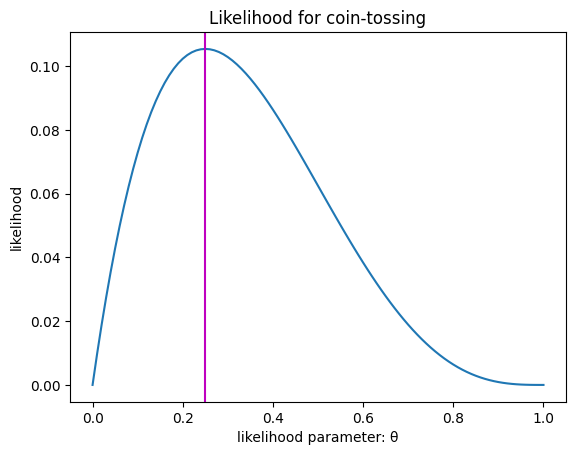

In [47]:
SEED = 42
set_seed(SEED)

N = 4
THETA = 0.6

biased_coin_tosses = simulate_coin_tosses(n = N, theta = THETA)
print(f"Sample: {biased_coin_tosses}\n")

###################################################################
# put your code here
#theta_values = torch.Tensor([1])
theta_values = torch.arange(0, 1.01, 1/100)
###################################################################

####################################################################################################
# Compute log-likelihoods
loglikelihoods_analytical = torch.stack([get_bernoulli_loglikelihood_analytical(biased_coin_tosses, theta) for theta in theta_values])

loglikelihoods = torch.stack([get_bernoulli_loglikelihood(biased_coin_tosses, theta) for theta in theta_values])

print("Log-likelihoods")
if not torch.equal(loglikelihoods_analytical, loglikelihoods):
  differences = torch.abs(loglikelihoods_analytical - loglikelihoods)
  print(f"Max difference: {differences.max()}.")
  print(f"Mean difference: {differences.mean()}")

print(f"Are the results close: {torch.allclose(loglikelihoods, loglikelihoods_analytical)}\n")

####################################################################################################
# Compute likelihoods
likelihoods_analytical = torch.stack([get_bernoulli_likelihood_analytical(biased_coin_tosses, theta) for theta in theta_values])

likelihoods = torch.stack([get_bernoulli_likelihood(biased_coin_tosses, theta) for theta in theta_values])

print("Likelihoods")
if not torch.equal(likelihoods_analytical, likelihoods):
  differences = torch.abs(likelihoods_analytical - likelihoods)
  print(f"Max difference: {differences.max()}.")
  print(f"Mean difference: {differences.mean()}")

print(f"Are the results close: {torch.allclose(likelihoods, likelihoods_analytical)}\n")

###################################################################################################
# plot likelihoods for thetas
fig, ax = plt.subplots()
ax.plot(theta_values, likelihoods)
ax.set_xlabel(xlabel="likelihood parameter: \u03B8")
ax.set_ylabel(ylabel="likelihood")
ax.set_title("Likelihood for coin-tossing")
plt.axvline(get_bernoulli_mle(biased_coin_tosses), color="m")

plt.show()

In [5]:
n_iter = 100
stops = {i for i in range(1, 21)}.union((50, 100))
mle_values = torch.zeros(n_iter)

for iter in range(n_iter):
  biased_coin_tosses = simulate_coin_tosses(n = N, theta = THETA)
  mle_values[iter] = get_bernoulli_mle(biased_coin_tosses)
  if iter+1 in stops:
    print(f"Number of iterations: {iter+1}")
    print("Minimum value of MLE: ", mle_values.min().item())
    print("Maximum value of MLE: ", mle_values.max().item())

Number of iterations: 1
Minimum value of MLE:  0.0
Maximum value of MLE:  0.5
Number of iterations: 2
Minimum value of MLE:  0.0
Maximum value of MLE:  0.75
Number of iterations: 3
Minimum value of MLE:  0.0
Maximum value of MLE:  0.75
Number of iterations: 4
Minimum value of MLE:  0.0
Maximum value of MLE:  0.75
Number of iterations: 5
Minimum value of MLE:  0.0
Maximum value of MLE:  1.0
Number of iterations: 6
Minimum value of MLE:  0.0
Maximum value of MLE:  1.0
Number of iterations: 7
Minimum value of MLE:  0.0
Maximum value of MLE:  1.0
Number of iterations: 8
Minimum value of MLE:  0.0
Maximum value of MLE:  1.0
Number of iterations: 9
Minimum value of MLE:  0.0
Maximum value of MLE:  1.0
Number of iterations: 10
Minimum value of MLE:  0.0
Maximum value of MLE:  1.0
Number of iterations: 11
Minimum value of MLE:  0.0
Maximum value of MLE:  1.0
Number of iterations: 12
Minimum value of MLE:  0.0
Maximum value of MLE:  1.0
Number of iterations: 13
Minimum value of MLE:  0.0
Maximu

# Posterior distibution

In Bayesian statistics the **posterior probability** is the probability of the model parameters $\theta$ given the observed data $\mathcal{D}$ and is denoted $\mathbb{P}(\theta | \mathcal{D})$. Note that it directly contrasts with the likelihood function, which is the probability of the observed data given the model parameters ($\mathbb{P}(\mathcal{D} | \theta)$).

Posterior probability is a type of conditional probability and it can be calculated using **Bayes' rule**, which updates the prior probability with information summarized by the likelihood.

If $\mathbb{P}(\theta)$ (based on our prior belief) is a *prior distribution* function of the parameters and $\mathbb{P}(\mathcal{D} | \theta)$ is the *likelihood* of the observed data $\mathcal{D}$, then the posterior probability is defined as:

$$\mathbb{P}(\theta | \mathcal{D}) = \frac{\mathbb{P}(\mathcal{D} | \theta)}{\mathbb{P}(\mathcal{D})} \mathbb{P}(\theta),$$

where $\mathbb{P}(\mathcal{D})$ is the normalizing constant and can be calculated as follows:

*   for continuous $\theta$:
$$\mathbb{P}(\mathcal{D}) = \int \mathbb{P}(\mathcal{D} | \theta) \mathbb{P}(\theta) d\theta $$
*   for discrete $\theta$:
$$\mathbb{P}(\mathcal{D}) = \sum_{\theta} \mathbb{P}(\mathcal{D} | \theta) \mathbb{P}(\theta).$$


> The posterior probability is **proportional** to the product of likelihood and prior probability:
> $$ \mathbb{P}(\theta | \mathcal{D}) \propto \mathbb{P}(\mathcal{D} | \theta) \mathbb{P}(\theta).$$





# Prior distibution

The **prior distribution** represents the information about an uncertain parameter $\theta$ that is combined with the probability distribution of new data to yield the **posterior distribution**, which in turn is used for future inferences and decisions involving $\theta$.

Prior $\mathbb{P}(\theta)$ that reflects domain-specific knowledge is called **informative**, while **uninformative** prior means that any observation is equally likely a priori ([principle of indifference](https://en.wikipedia.org/wiki/Principle_of_indifference)), since no expert knowledge was available.

The prior distributions of model parameters will often depend on their own *hyperparameters*. Their uncertainty can be expressed as *hyperprior* probability distributions, which in theory can lead to prior decomposition into *hierachical priors*.

# Conjugate priors

Conjugate priors are invariant with respect to the distribution family under multiplication with the likelihood. That means that if prior distribution comes from family of $\mathcal{B}$ distributions, so $\mathbb{P}(\theta) = \mathcal{B}(\theta; \alpha, \beta)$, then after "updating" prior distibution by multiplying it by the likelihood $\mathbb{P}(\mathcal{D} | \theta)$ (and normalizing), our posterior distribution will still be the distribution from $\mathcal{B}$ family.

> ## $\mathcal{B}$ distributions
>
> The probability density function of $\mathcal{B}$ distribution for $0 \leq \theta \leq 1$ and shape parameters $\alpha, \beta > 0$ parameters is expressed as follows:
>
>$$\mathcal{B}(\theta; \alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} \theta^{\alpha - 1}(1 - \theta)^{\beta - 1},$$
>where $\Gamma(x) = \int_0^\infty e^{-t} t^{x-1} dt$.
>
>If $\theta \notin [0, 1]$, then $\mathcal{B}(\theta, \alpha, \beta) = 0.$
>
> Notice that for $\alpha = \beta = 1$ this prior reduces to uniform distribution on $[0, 1]$: $\mathcal{B}(\theta; \alpha, \beta) = 1$ for $\theta \in [0, 1]$ and $0$ otherwise.
>
>Figure below illustrates how shape parameters $\alpha, \beta$ impact $\mathcal{B}$ distribution.
>Beta_distribution_pdf.svg

## Conjugate prior for coin tossing

To model the distribution of the $\theta$ parameter of Bernoulli distribution (Bayesian approach: we assume that $\theta$ is unknown random variable) we can use $\mathcal{B}$ distribution with parameters $\alpha$ and $\beta$ as a conjugate prior:

$$\mathbb{P}(\theta) =\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} \theta^{\alpha - 1}(1 - \theta)^{\beta - 1}.$$

<!-- Since we assume that $\theta \sim \mathcal{B}(\alpha, \beta)$, then prior distribution is given by:

$$\mathbb{P}(\theta) = $$ -->

<!-- $$\mathcal{B}(\theta; \alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} \theta^{\alpha - 1}(1 - \theta)^{\beta - 1} \quad \text{if } 0 \leq \theta \leq 1,$$

where $\Gamma(x) = \int_0^\infty e^{-t} t^{x-1} dt$. -->

### What about the posterior?

We can now compute the **posterior distribution** of $\theta$ using *Bayes' rule*. We get:

$$\begin{align*}
\mathbb{P}(\theta | \mathcal{D}) &= \frac{\mathbb{P}(\mathcal{D} | \theta)}{\mathbb{P}(\mathcal{D})} \mathbb{P}(\theta) \\
&= \frac{1}{\mathbb{P}(\mathcal{D})}\Bigl(\theta^{k} (1 - \theta)^{N - k}\Bigr) \Bigl(\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} \theta^{\alpha - 1}(1 - \theta)^{\beta - 1}\Bigr)\\
&= \frac{\Gamma(\alpha + \beta)}{\mathbb{P}(\mathcal{D}) \Gamma(\alpha) \Gamma(\beta)}\Bigl( \theta^{k + \alpha - 1} (1 - \theta)^{N - k + \beta - 1}\Bigr) \\
&= C \theta^{(k+\alpha)-1}(1 - \theta)^{(N-k+\beta) - 1}\\
&= C \theta^{\tilde{\alpha}-1} (1 - \theta)^{\tilde{\beta} -1}
\end{align*}$$

Since we know that $\mathcal{B}$ distribution is a conjugate prior, then $C = \frac{\Gamma(\tilde{\alpha} + \tilde{\beta})}{\Gamma(\tilde{\alpha}) \Gamma(\tilde{\beta})}$.

<!-- = \frac{\Gamma(\alpha + \beta + N)}{\Gamma(k + \alpha) \Gamma(N -k + \beta)} -->

So finally we can see $\tilde{\alpha} = k + \alpha, \tilde{\beta} = N -k + \beta$ are hyperparameters determining the probability distribution of $\theta$ conditional on the data $\mathcal{D},$ which is precisely **posterior distribution** given by:

$$\mathbb{P}(\theta | \mathcal{D}) = \mathcal{B}(\theta | k + \alpha, N - k + \beta).$$





### **Exercise 2**: Conjugate prior for coin tossing

Same as in Exercise 1: $N = 4, \theta = 0.6$.

1.  Write `get_log_posterior_analytical` function that computes log posterior distribution of $\theta$ for the coin-tossing experiment. Use the analytical formula from above for posterior distribution for a given data, $\theta$, $\alpha$ and $\beta$.

2. If $\mathbb{P}(\theta | \mathcal{D}) \propto \mathbb{P}(\mathcal{D} | \theta) \mathbb{P}(\theta)$, then what is $\log\mathbb{P}(\theta | \mathcal{D})$ proportional to?

3. Write `get_log_posterior_approx` function that approximates (as in point 2: we are ignoring the normalization by the probability of the data) log of posterior distribution for given data, $\theta$, $\alpha$ and $\beta$. Use `torch.distributions.Beta` for the prior.

4. Let $\alpha = \beta = 3$.

5. For $101$ different, equally spaced values of $\theta$ compute and plot the log of prior probability. *Reminder*: $\mathcal{B}$ distribution is conjugated prior for Bernoulli (and binomial) distribution.

6. Calculate and plot theorethical log posterior probability using `get_log_posterior_analytical` function for the the $101$ different $\theta$ values.

7. Calculate and plot approximate log posterior probability using  `get_log_posterior_approx` function for the the $101$ different $\theta$ values.

8. Calculate and plot log-likelihood for the the $101$ different $\theta$ values.

8. Add a vertical line at the value that maximizes the posterior probability. Add legend as well.

In [18]:
from torch.distributions import Beta

def get_log_posterior_analytical(data, theta, alpha=3, beta=3):
  ########################################################
  # Your code
  ########################################################
  k = int(data.sum())
  N = int(data.shape[0])
  dist = Beta(k+alpha, N-k+beta)
  return dist.log_prob(theta).sum()
  pass

def get_log_posterior_approx(data, theta, alpha=3, beta=3):
  ########################################################
  # Your code
  ########################################################
  k = int(data.sum())
  N = int(data.shape[0])
  prior_dist = Beta(k+alpha, N-k+beta)
  loglikelihood = get_bernoulli_loglikelihood(data, theta)
  log_prior_prob = prior_dist.log_prob(theta)
  return loglikelihood + log_prior_prob

  pass

"""def get_log_prior_analytical(data, theta, alpha=3, beta=3):
  ########################################################
  # Your code
  ########################################################
  k = int(data.sum())
  N = int(data.shape[0])
  dist = Beta(k+alpha, N-k+beta)
  return dist.log_prob(theta).sum().exp()
  pass

def get_log_prior_approx(data, theta, alpha=3, beta=3):
  ########################################################
  # Your code
  ########################################################
  k = int(data.sum())
  N = int(data.shape[0])
  prior_dist = Beta(k+alpha, N-k+beta)
  loglikelihood = get_bernoulli_likelihood(data, theta)
  prior_prob = prior_dist.log_prob(theta).sum().exp()
  return loglikelihood + prior_prob

  pass"""

'def get_log_prior_analytical(data, theta, alpha=3, beta=3):\n  ########################################################\n  # Your code\n  ########################################################\n  k = int(data.sum())\n  N = int(data.shape[0])\n  dist = Beta(k+alpha, N-k+beta)\n  return dist.log_prob(theta).sum().exp()\n  pass\n\ndef get_log_prior_approx(data, theta, alpha=3, beta=3):\n  ########################################################\n  # Your code\n  ########################################################\n  k = int(data.sum())\n  N = int(data.shape[0])\n  prior_dist = Beta(k+alpha, N-k+beta)\n  loglikelihood = get_bernoulli_likelihood(data, theta)\n  prior_prob = prior_dist.log_prob(theta).sum().exp()\n  return loglikelihood + prior_prob\n\n  pass'

Seed set to 42
Sample: tensor([0., 0., 1., 0.])



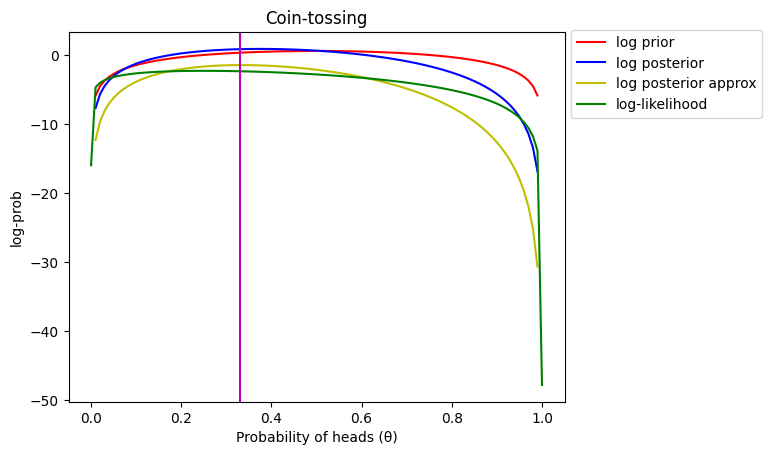

In [50]:
SEED = 42
ALPHA = 3
BETA = 3
N = 4
THETA = 0.6
set_seed(SEED)

biased_coin_tosses = simulate_coin_tosses(n = N, theta = THETA)
print(f"Sample: {biased_coin_tosses}\n")
step = 0.01
theta_values = torch.arange(0, 1+step, step)

# log prior probability
prior_dist = Beta(ALPHA, BETA)
log_prior_probs = prior_dist.log_prob(theta_values)

# log analytical posterior probability
log_posteriors_analytical = torch.tensor([get_log_posterior_analytical(biased_coin_tosses, theta, ALPHA, BETA) for theta in theta_values])

# log approximate posterior probability)
log_posteriors_approx = torch.tensor([get_log_posterior_approx(biased_coin_tosses, theta, ALPHA, BETA) for theta in theta_values])

# log-likelihood
log_likelihoods = torch.tensor([get_bernoulli_loglikelihood(biased_coin_tosses, theta) for theta in theta_values])

# Plot all together
fig, ax = plt.subplots()
ax.plot(theta_values, log_prior_probs, c="r", label="log prior")
ax.plot(theta_values, log_posteriors_analytical, c="b", label="log posterior")
ax.plot(theta_values, log_posteriors_approx, c="y", label="log posterior approx")
ax.plot(theta_values, log_likelihoods, c="g", label="log-likelihood")
ax.set_xlabel(xlabel="Probability of heads (\u03B8)")
ax.set_ylabel(ylabel="log-prob")
ax.set_title("Coin-tossing")

# plt.axvline(get_bernoulli_mle(biased_coin_tosses), color="m")
plt.axvline(theta_values[log_posteriors_approx.argmax()], color = "m")

plt.legend(bbox_to_anchor=(1., 1.025))

plt.show()

### Why not work with probs instead of log-probs?

In [34]:
def get_posterior_analytical(data, theta, alpha=3, beta=3):
  ########################################################
  # Your code
  ########################################################
  return get_log_posterior_analytical(data, theta, alpha, beta).exp()

def get_posterior_approx(data, theta, alpha=3, beta=3):
  ########################################################
  # Your code
  ########################################################
  return get_log_posterior_approx(data, theta, alpha, beta).exp()

Seed set to 42
Sample: tensor([0., 0., 1., 0.])



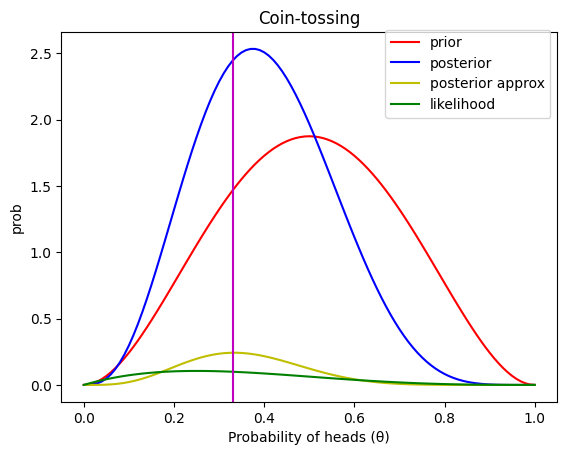

In [52]:
# Why not work with probs
set_seed(SEED)
ALPHA = 3
BETA = 3
N = 4
THETA = 0.6

biased_coin_tosses = simulate_coin_tosses(n = N, theta = THETA)
print(f"Sample: {biased_coin_tosses}\n")
step = 0.01
theta_values = torch.arange(0, 1+step, step)

# prior probability
prior_dist = Beta(ALPHA, BETA)
prior_probs = prior_dist.log_prob(theta_values).exp()

# analytical posterior probability
posteriors_analytical = torch.tensor([get_posterior_analytical(biased_coin_tosses, theta) for theta in theta_values])

# approximate posterior probability
posteriors_approx = torch.tensor([get_posterior_approx(biased_coin_tosses, theta) for theta in theta_values])

# likelihood
likelihoods = torch.tensor([get_bernoulli_likelihood(biased_coin_tosses, theta) for theta in theta_values])

# Plot all together
fig, ax = plt.subplots()
ax.plot(theta_values, prior_probs, c="r", label="prior")
ax.plot(theta_values, posteriors_analytical, c="b", label="posterior")
ax.plot(theta_values, posteriors_approx, c="y", label="posterior approx")
ax.plot(theta_values, likelihoods, c="g", label="likelihood")
ax.set_xlabel(xlabel="Probability of heads (\u03B8)")
ax.set_ylabel(ylabel="prob")
ax.set_title("Coin-tossing")

# plt.axvline(get_bernoulli_mle(biased_coin_tosses), color="m")
plt.axvline(theta_values[log_posteriors_approx.argmax()], color = "m")

plt.legend(bbox_to_anchor=(1., 1.025))

plt.show()

## Maximum a Posteriori (MAP) estimate

> **Maximum a Posteriori** (MAP) estimate
>
>$$\hat{\theta}_{MAP} = \text{arg}\max_{\theta}\mathbb{P}(\theta | \mathcal{D})$$

Since $\mathbb{P}(\theta | \mathcal{D}) \propto \mathbb{P}(\mathcal{D} | \theta) \mathbb{P}(\theta)$ we have

$$\begin{align*}
  \hat{\theta}_{MAP} &= \text{arg}\max_{\theta} \mathbb{P}(\mathcal{D} | \theta) \mathbb{P}(\theta) \\
  &= \text{arg}\max_{\theta} \left( \log \mathbb{P}(\mathcal{D} | \theta) + \log \mathbb{P}(\theta) \right) \\
  &= \text{arg}\max_{\theta} \left( \log \prod_i \mathbb{P}(x_i | \theta) +  \log \mathbb{P}(\theta) \right) \\
  &= \text{arg}\max_{\theta} \left( \sum_i \log \mathbb{P}(x_i | \theta) +  \log \mathbb{P}(\theta) \right).
\end{align*}$$

Although MAP is wildely applied in machine learning, in the Bayesian inference MLE is preffered, since MAP only aims to obtain point estimate rather than entire posterior distribution.

### **Exercise 3**: MLE vs MAP

1. Compute the difference between MLE and MAP as a function of the number of coin tosses $n$?

2. What is happening? Why?

3. What is the MAP equal to if the prior is uniform?

In [53]:
def get_abs_dist(estimator, other):
  return torch.abs(estimator - other)

def get_map(data):
  ########################################################
  # Your code
  ########################################################
  values = torch.arange(0, 1.01, 0.01)
  log_posteriors = torch.tensor([get_log_posterior_analytical(data, theta) for theta in values])
  return values[log_posteriors.argmax()]
  pass

In [55]:
mles = []
maps = []
dists = []
for n in range(0, 100, 1):
    data = simulate_coin_tosses(n = n, theta = THETA)
    mle = get_bernoulli_mle(data)
    map = get_map(data)
    mles.append(mle)
    maps.append(map)
    dists.append(get_abs_dist(mle, map))

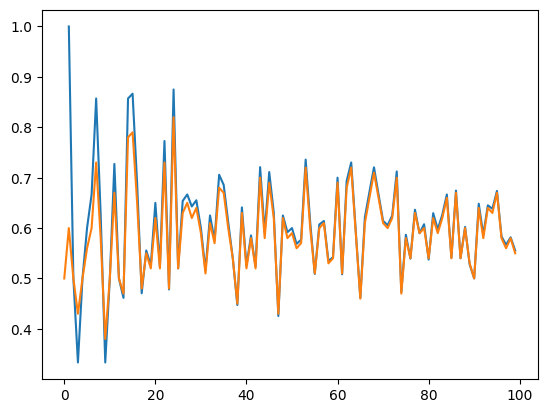

In [56]:
plt.plot(torch.stack(mles))
plt.plot(torch.stack(maps))
plt.show()

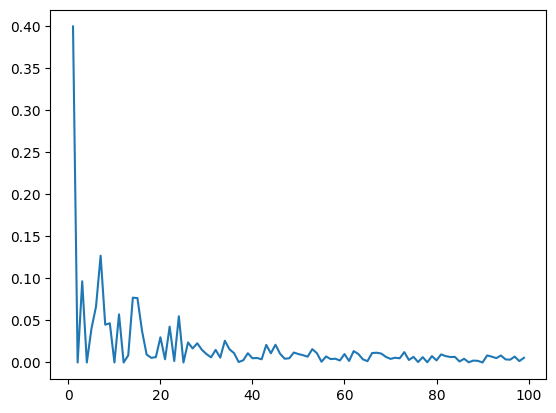

In [57]:
plt.plot(dists)
plt.show()